# **Tobacco Consumption in the United States: Data Analysis and Forecasting**

Team 16\
Ana Vargas\
Hugo Campos\
Jorge Hugo Araiza\
Pablo  Vera Terán\
Last Update: March 06, 2022


## **Introduction**

---



The data used is from the United States between the years of 2000 and 2021. The original file has 14 columns and 273 entries. It divides the total tobacco consumption in topics, whether it is combustible or non-combustible. It is also divided on measures and submeasures. The first ones refer to the presentation in which the tobacco is: smokeless, cigarette, cigar, or loose. 

Meanwhile, submeasures are more detailed. If the measure is cigar, the submeasures are small, large o total cigars. All the entries come in different units: pounds, cigarettes, cigarette equivalent, and cigar. Some of the measures, for example loose tobacco, come in two units to help better understand and process the information.

> All the entries on the dataset contain information on imports and domestic production. This kind of information is helpful when forecasting where the tobacco will be sourced from.


## **Data Exploration and Visualization**

---



**Exploration**

In [58]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [59]:
data = pd.read_csv('/content/Tobacco_Consumption.csv')
data.head() 

,Year,LocationAbbrev,LocationDesc,Population,Topic,Measure,Submeasure,Data Value Unit,Domestic,Imports,Total,Domestic Per Capita,Imports Per Capita,Total Per Capita
0,2000,US,National,209786736,Noncombustible Tobacco,Smokeless Tobacco,Chewing Tobacco,Pounds,4.550216e+07,91965,4.559412e+07,0.217,0.0,0.217
1,2000,US,National,209786736,Combustible Tobacco,Cigarettes,Cigarette Removals,Cigarettes,4.232500e+11,12319663000,4.355700e+11,2018.000,59.0,2076.000
2,2000,US,National,209786736,Combustible Tobacco,Cigars,Total Cigars,Cigars,5.612867e+09,548243000,6.161110e+09,27.000,3.0,29.000
3,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Cigarette Equivalents,8.291277e+09,702741662,8.994018e+09,40.000,3.0,43.000
4,2000,US,National,209786736,Combustible Tobacco,Loose Tobacco,Total Loose Tobacco,Pounds,1.684166e+07,1427444,1.826910e+07,0.000,0.0,0.000


In [60]:
data.info() #Summary of the number of values and types of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 273 non-null    int64  
 1   LocationAbbrev       273 non-null    object 
 2   LocationDesc         273 non-null    object 
 3   Population           273 non-null    int64  
 4   Topic                273 non-null    object 
 5   Measure              273 non-null    object 
 6   Submeasure           273 non-null    object 
 7   Data Value Unit      273 non-null    object 
 8   Domestic             273 non-null    float64
 9   Imports              273 non-null    int64  
 10  Total                273 non-null    float64
 11  Domestic Per Capita  273 non-null    float64
 12  Imports Per Capita   273 non-null    float64
 13  Total Per Capita     273 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 30.0+ KB


In the table above it is possible to visualize that no column has null values, every entry has a value.


In [61]:
data = data.drop(columns=['LocationAbbrev', 'LocationDesc']) 

Because all the data is from the United States and the descriptions are national, *LocationAbbrev* and *LocationDesc* columns were removed to simplify the database.

In [62]:
data = data[[not bool(re.search('Total', sub)) for sub in data.Submeasure]]

Subcategories consisting of the sum of other categories are removed before any visualization, as this could affect the results when viewing and handling the data.

In [63]:
# Visualize the distribution of measure and submeasures
data.groupby(['Measure','Submeasure', 'Data Value Unit'])['Total'].sum() 

Measure            Submeasure             Data Value Unit      
Cigarettes         Cigarette Removals     Cigarettes               6.740502e+12
Cigars             Large Cigars           Cigars                   1.931963e+11
                   Small Cigars           Cigars                   4.023731e+10
Loose Tobacco      Pipe Tobacco           Cigarette Equivalents    2.307750e+11
                                          Pounds                   4.687617e+08
                   Roll-Your-Own Tobacco  Cigarette Equivalents    9.170287e+10
                                          Pounds                   1.862715e+08
Smokeless Tobacco  Chewing Tobacco        Pounds                   6.385033e+08
                   Snuff                  Pounds                   2.048766e+09
Name: Total, dtype: float64

#Visualization

Submeasure Total Box Plot (Only products measured in pounds).
>They show the median and interquartile range of each product, it allows a better visualization of the usual yearly comsumption.

The most consumed presentation of tobacco is snuff. 

Text(0, 0.5, 'Total (pounds)')

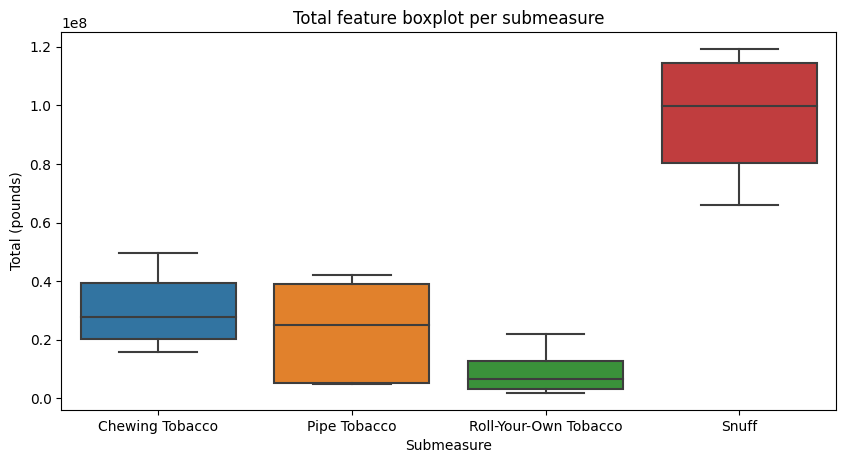

In [64]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 100)
data_pounds_box = pd.DataFrame(data[data['Data Value Unit'] == 'Pounds']) #Data where the unit is Pounds
sns.boxplot(x = 'Submeasure', y = 'Total', data = data_pounds_box)
ax.set_title('Total feature boxplot per submeasure')
ax.set_ylabel('Total (pounds)')

Submeasure Total Box Plot 

The products compared for the boxplot are cigars in its two sizes, the preferred ones are large cigars.

Text(0, 0.5, 'Total (Cigars)')

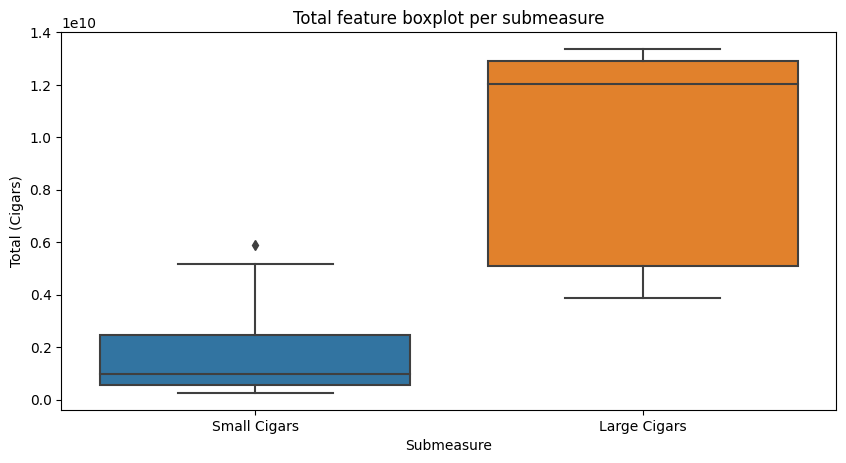

In [65]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 100)
data_cigars_box = pd.DataFrame(data[data['Data Value Unit'] == 'Cigars']) #Data that which unit is Cigars
sns.boxplot(x = 'Submeasure', y = 'Total', data = data_cigars_box)
ax.set_title('Total feature boxplot per submeasure')
ax.set_ylabel('Total (Cigars)')

Submeasure Total Box Plot (Only products measured in cigarettes and cigarettes equivalent)

Text(0, 0.5, 'Total (Cigarettes)')

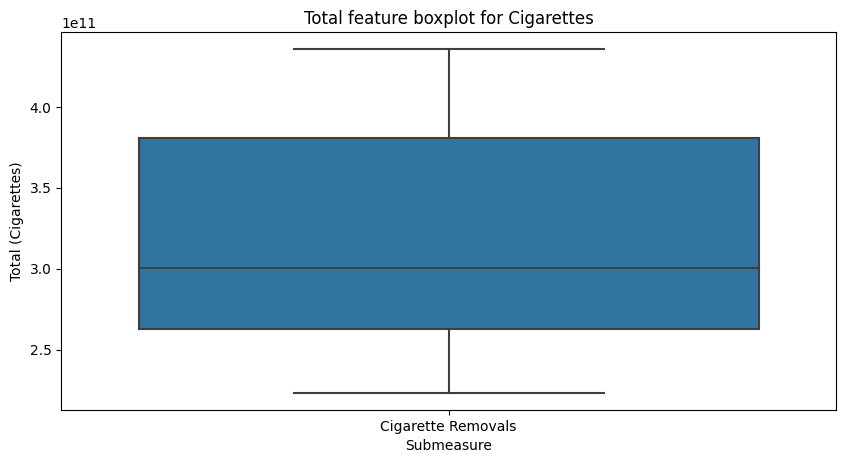

In [66]:
fig, ax = plt.subplots(figsize=(10,5), dpi= 100)
data_cigarettes_box = pd.DataFrame(data[data['Data Value Unit'] == 'Cigarettes']) #Shows all the data in which the units are Cigars
sns.boxplot(x = 'Submeasure', y = 'Total', data = data_cigarettes_box)
ax.set_title('Total feature boxplot for Cigarettes')
ax.set_ylabel('Total (Cigarettes)')

From the box graphs it is possible to observe that only one of the sub measures presents an outlier, this being the small cigars. Thus, none of the other submeasures present any outliers that need to be removed or fixed in any way.

###Total Domestic and Imported Tobacco Products by Year (Only products measured in pounds)

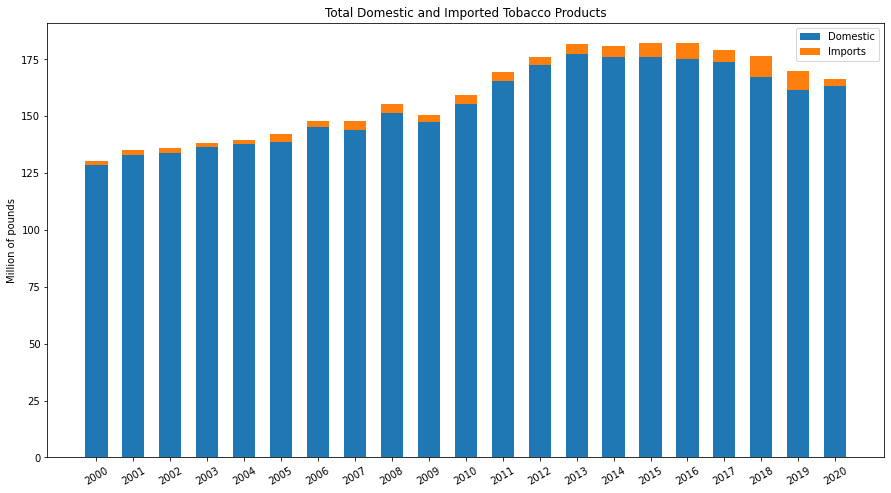

In [67]:
#data selection
g1_labels = data['Year'].unique()
data_pounds_box = pd.DataFrame(data[data['Data Value Unit'] == 'Pounds'])
g1_domestic_prod = data_pounds_box.groupby(['Year'])['Domestic'].sum() / 1000000
g1_imported_prod =  data_pounds_box.groupby(['Year'])['Imports'].sum() / 1000000

#creating subplots plot
g1_width = 0.6
g1_fig, g1_ax = plt.subplots(figsize = (15,8))

#setting bars with series
g1_ax.bar(g1_labels, g1_domestic_prod, g1_width, label='Domestic')
g1_ax.bar(g1_labels, g1_imported_prod, g1_width, bottom = g1_domestic_prod, label='Imports')

#setting graph parameters
g1_ax.set_xticks(g1_labels, minor=False)
g1_ax.xaxis.set_tick_params(labelrotation=30.0)
g1_ax.set_ylabel('Million of pounds')
g1_ax.set_title('Total Domestic and Imported Tobacco Products')
g1_ax.legend()

#plotting
plt.show()

Domestic production increased during 2010's. 
Imports increased slightly when the domestic tobacco consumption was reduced.

###Total Domestic and Imported Tobacco Products by Year (Only products measured in cigars)

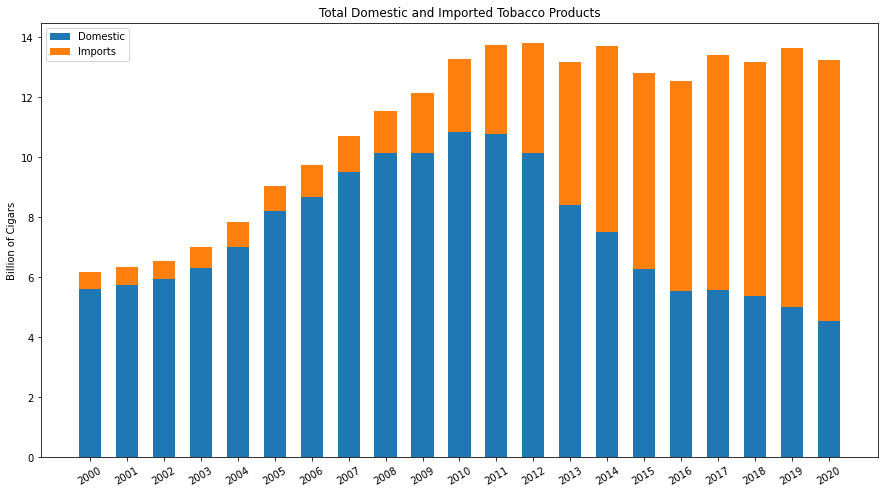

In [68]:
#data selection
g1_labels = data['Year'].unique()
data_cigars_box = pd.DataFrame(data[data['Data Value Unit'] == 'Cigars'])
g1_domestic_prod = data_cigars_box.groupby(['Year'])['Domestic'].sum() / 1000000000
g1_imported_prod =  data_cigars_box.groupby(['Year'])['Imports'].sum() / 1000000000

#creating subplots plot
g1_width = 0.6
g1_fig, g1_ax = plt.subplots(figsize = (15,8))

#setting bars with series
g1_ax.bar(g1_labels, g1_domestic_prod, g1_width, label='Domestic')
g1_ax.bar(g1_labels, g1_imported_prod, g1_width, bottom = g1_domestic_prod, label='Imports')

#setting graph parameters
g1_ax.set_xticks(g1_labels, minor=False)
g1_ax.xaxis.set_tick_params(labelrotation=30.0)
g1_ax.set_ylabel('Billion of Cigars')
g1_ax.set_title('Total Domestic and Imported Tobacco Products')
g1_ax.legend()

#plotting
plt.show()

Domestic cigar consumption increased during 2004-2011. When it began decreasing, the demand was met by imported products. 

>It is unknown whether the domestic consumption was reduced by the arrival of imports.

###Total Domestic and Imported Tobacco Products by Year (Only cigarettes)

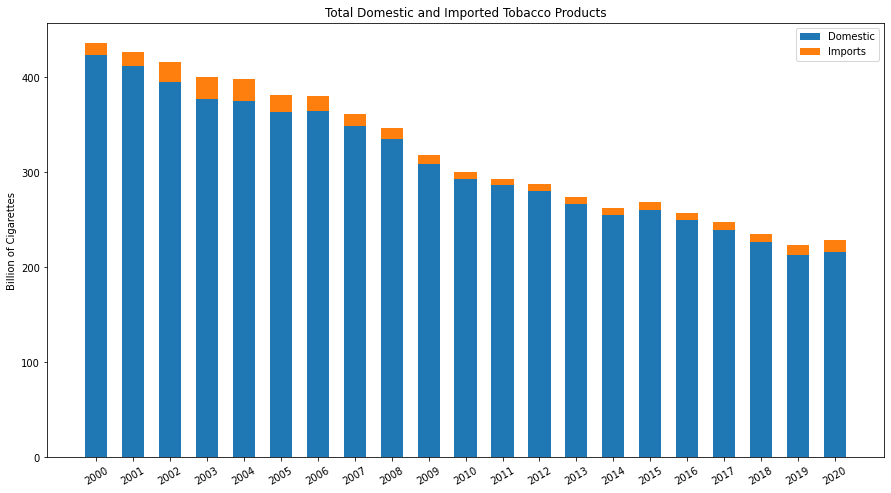

In [69]:
#data selection
g1_labels = data['Year'].unique()
data_cigarettes_box = pd.DataFrame(data[data['Data Value Unit'] == 'Cigarettes'])
g1_domestic_prod = data_cigarettes_box.groupby(['Year'])['Domestic'].sum() / 1000000000
g1_imported_prod =  data_cigarettes_box.groupby(['Year'])['Imports'].sum() / 1000000000

#creating subplots plot
g1_width = 0.6
g1_fig, g1_ax = plt.subplots(figsize = (15,8))

#setting bars with series
g1_ax.bar(g1_labels, g1_domestic_prod, g1_width, label='Domestic')
g1_ax.bar(g1_labels, g1_imported_prod, g1_width, bottom = g1_domestic_prod, label='Imports')

#setting graph parameters
g1_ax.set_xticks(g1_labels, minor=False)
g1_ax.xaxis.set_tick_params(labelrotation=30.0)
g1_ax.set_ylabel('Billion of Cigarettes')
g1_ax.set_title('Total Domestic and Imported Tobacco Products')
g1_ax.legend()

#plotting
plt.show()

Cigarette consumption is continously declining, imports have not been affected.

###Cigarettes and Cigars consumed by Year

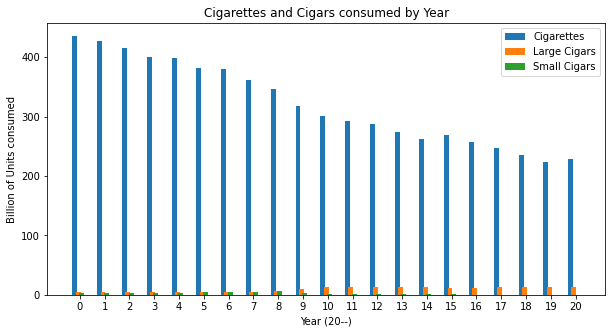

In [70]:
#data selection
g2_labels = data['Year'].unique()
g2_cigarettes = data[data.Submeasure == 'Cigarette Removals']['Total'] / 1000000000
g2_lg_cigars = data[data.Submeasure == 'Large Cigars']['Total'] / 1000000000
g2_sm_cigars = data[data.Submeasure == 'Small Cigars']['Total'] /1000000000

#creating subplots plot
g2_x = np.arange(len(g2_labels))  # the label locations
g2_width = 0.2  # the width of the bars
g2_fig, g2_ax = plt.subplots(figsize = (10,5))

#setting bars with series
g2_rects1 = g2_ax.bar(g2_x - g2_width, g2_cigarettes, g2_width, label='Cigarettes')
g2_rects2 = g2_ax.bar(g2_x - g2_width*1/3, g2_lg_cigars, g2_width, label='Large Cigars')
g2_rects3 = g2_ax.bar(g2_x + g2_width*1/3, g2_sm_cigars, g2_width, label='Small Cigars')

#setting graph parameters
g2_ax.set_ylabel('Billion of Units consumed')
g2_ax.set_xlabel('Year (20--)')
g2_ax.set_title('Cigarettes and Cigars consumed by Year')
g2_ax.set_xticks(g2_x)
g2_ax.legend()

#plotting
plt.show()

Cigarette and small cigars consumption has decreased while large cigars have become more popular.

###Loose Tobacco and Smokeless Tobacco consumed by Year

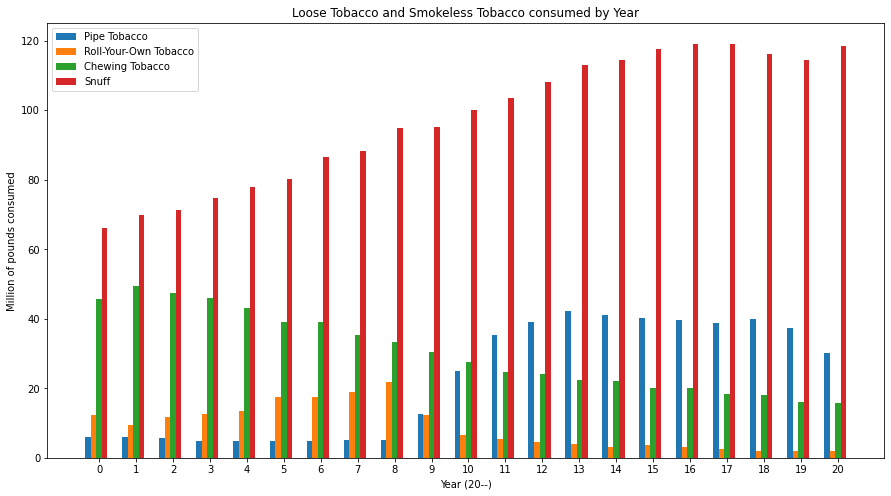

In [71]:
#data selection
g3_labels = data['Year'].unique()
g3_pipe = data[(data.Submeasure == 'Pipe Tobacco') & (data['Data Value Unit'] == 'Pounds')]['Total'] / 1000000
g3_roll = data[(data.Submeasure == 'Roll-Your-Own Tobacco') & (data['Data Value Unit'] == 'Pounds')]['Total'] / 1000000
g3_chewing = data[(data.Submeasure == 'Chewing Tobacco') & (data['Data Value Unit'] == 'Pounds')]['Total'] / 1000000
g3_snuff = data[(data.Submeasure == 'Snuff') & (data['Data Value Unit'] == 'Pounds')]['Total'] / 1000000

#creating subplots plot
g3_x = np.arange(len(g3_labels))  # the label locations
g3_width = 0.15  # the width of the bars
g3_fig, g3_ax = plt.subplots(figsize = (15,8))

#setting bars with series
g3_rects1 = g3_ax.bar(g3_x - g3_width*2, g3_pipe, g3_width, label='Pipe Tobacco')
g3_rects2 = g3_ax.bar(g3_x - g3_width, g3_roll, g3_width, label='Roll-Your-Own Tobacco')
g3_rects3 = g3_ax.bar(g3_x , g3_chewing, g3_width, label='Chewing Tobacco')
g3_rects4 = g3_ax.bar(g3_x + g3_width, g3_snuff, g3_width, label='Snuff')

#setting graph parameters
g3_ax.set_xlabel('Year (20--)')
g3_ax.set_ylabel('Million of pounds consumed')
g3_ax.set_title('Loose Tobacco and Smokeless Tobacco consumed by Year')
g3_ax.set_xticks(g3_x)
g3_ax.legend()

#plotting
plt.show()

## **Forecast Modeling**

---



>The objective of this forecasting model is to predict the total consumption of cigarettes for 2021. It is based on the information available in the dataset and recorded during the previous 20 years.

For the forecasting process two different approaches were made: a first approach with the time series of cigars without any modification, and an approach after applying feature engineering.

**Modeling with time series**

---



**Creation and visualization of the time series**

Since the objective is making a forecast of the cigarette consumption, all the information from the database that is not related to this category was deleted. 

The time series is built from the index that indicates the year, and from the *Total* feature, which indicates the sum of the domestic and imported consumption of cigars for each year.

In [72]:
pip install statsmodels --upgrade #Update required for proper code operation

In [73]:
pip install pmdarima #Module required for proper code operation

In [74]:
df = data.copy(deep = True)
df.index = df.Year

In [75]:
#Extracting the timeseries, using only the index year, and the total consumption column
ts = pd.DataFrame(df[(df.Measure == 'Cigarettes')]['Total'] / 1000000000) 
#The total consumption was divided by 1 billion to make it easier to understand
ts

,Total
Year,
2000,435.570
2001,426.720
2002,415.724
2003,400.327
2004,397.655
2005,381.098
2006,380.594
2007,361.590
2008,346.420


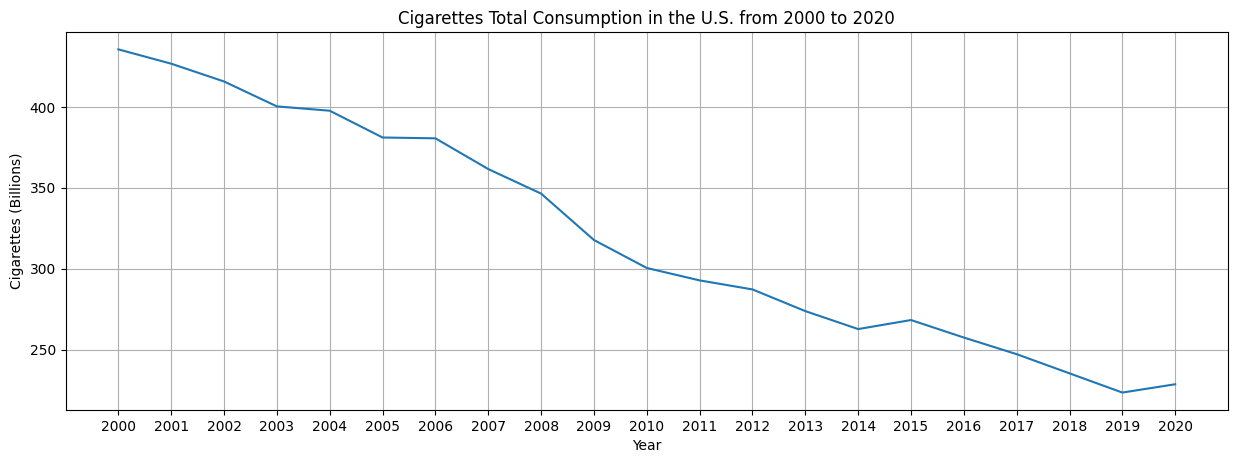

In [76]:
#Plotting the timeseries to visualize the data
fig, ax = plt.subplots(figsize=(15,5), dpi = 100)                                  
plt.plot(ts.index, ts['Total'], color = 'tab:blue')
plt.gca().set(title = 'Cigarettes Total Consumption in the U.S. from 2000 to 2020', 
              xlabel = 'Year',
              ylabel = 'Cigarettes (Billions)')
plt.xticks(ts.index)
plt.grid(True)
plt.show()

The time series above shows the evolution of cigarette consumption in the first 21 years of the XXI Century. 

As it can be seen, this time series doesn't present any kind of seasonality. Nevertheless, there is a clear trend in the number of cigarettes consumed, this being a downward trend. 

Based on this last detail, it is possible to expect the model to make a lower consumption forecast than in previous years. Even so, due to the positive change that occurs between 2019 and 2020, it is feasible that the model estimates a higher consumption than the last year recorded.

**Test for Stationarity**

Before any model was built, the time series was tested to be stationary, using an augmented Dickey Fuller test (ADF Test).

In [77]:
from statsmodels.tsa.stattools import adfuller, kpss

In [78]:
#Augmented Dickey Fuller test (ADF Test)
result = adfuller(ts['Total'], autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.024653761493079
p-value: 0.0012867787254405298
Critial Values:
   1%, -4.137829282407408
Critial Values:
   5%, -3.1549724074074077
Critial Values:
   10%, -2.7144769444444443


Since P-value is less than the significance level (0.05), it is possible to reject the null hypothesis and conclude that the time series doesn't possesses an unit root, and is stationary.

**Model creation I**

Once confirmed the stationarity of the data, the model was carried out. Two models were elaborated in order to compare different forecasts, as well as consider the different options that could be presented to analyze the time series. Therefore, an Auto Regressive Model (AR), an exponential Holt Smoothing Model (ETS)  and Linear Regression model were selected for this task. As noted above, the previous selection was based on the absence of seasonality in the time series, and the prominent presence of a negative trend.

In [79]:
def fit_models(data): #Funcion that uses already prepared time series (Date - Value)
  from statsmodels.tsa.ar_model import AutoReg
  from statsmodels.tsa.exponential_smoothing.ets import ETSModel
  from statsmodels.tsa.arima.model import ARIMA
  from sklearn.linear_model import LinearRegression
  from pmdarima import auto_arima
  import warnings
  from math import sqrt
  from sklearn.metrics import mean_squared_error
  warnings.filterwarnings('ignore')

  models_info = {   #Dictionary to save relevant information
    'ETS':{
        'RMSE': None,
        'Forecast 2021': None
    },
    'Auto Regression':{
        'RMSE': None,
        'Forecast 2021': None
    },
    'Linear Regression':{
       'RMSE': None,
        'Forecast 2021': None 
    }
  }

  # Split the data into Train and Test
  train = data[:round(len(data)*0.8)] #Train set: 80%
  test = data[round(len(data)*0.8):]  #Test set: 20%

  # Exponential Smoothing (ETS) Model
  ets_model = ETSModel(train['Total']).fit()
  ets_test = ets_model.predict(start = len(train), end = len(data)-1, dynamic = False)  # Test results
  ets_rmse = sqrt(mean_squared_error(test.values, ets_test.values))                     # Accuracy metric
  ets_forecast = ets_model.predict(start = 0, end = len(data), dynamic = False)         # Full data forecast
  models_info['ETS']['RMSE'] = ets_rmse                                                 # Save the RMSE value in the dictionary
  models_info['ETS']['Forecast 2021'] = ets_forecast[21]                                # Save the forecast for 2021 in the dicionary

  # Auto Regression (AR) Model
  ar_model = AutoReg(train, lags = 1).fit()
  ar_test = ar_model.predict(start = len(train), end = len(data)-1, dynamic = False)
  ar_rmse = sqrt(mean_squared_error(test.values, ar_test.values))
  ar_forecast = ar_model.predict(start = 0, end = len(data), dynamic = False)
  models_info['Auto Regression']['RMSE'] = ar_rmse
  models_info['Auto Regression']['Forecast 2021'] = ar_forecast[21]

  # Linear Regression Model
  data['Total_LastYear'] = data['Total'].shift(+1)      #Feature #1: Total last year value
  data['Total_2YearsBack'] = data['Total'].shift(+2)    #Feature #2: Total 2 years ago value
  data['Total_3YearsBack'] = data['Total'].shift(+3)    #Feature #3: Total 3 years ago value
  data = data.dropna()
  x = (data.iloc[:,[1,2,3]])  #Putting all the features in one array
  y = (data.Total)

  x_train, x_test, y_train, y_test = x[:round(len(x)*0.8)], x[round(len(x)*0.8):], y[:round(len(y)*0.8)], y[round(len(y)*0.8):] #80/20 division again


  linear_model = LinearRegression().fit(x_train, y_train)
  linear_test = linear_model.predict(x_test)
  linear_rmse = sqrt(mean_squared_error(y_test.values, linear_test))
  linear_forecast = linear_model.predict(x)
  prediction21 = linear_model.predict(np.array([[228.565, 223.433, 235.319]]))
  linear_forecast = np.append(linear_forecast, prediction21, axis = 0)

  for i in range(3):
    linear_forecast = np.insert(linear_forecast, 0, 400, axis = 0)      #Adding constant values so it gets easier to plot, these 400 don't represent anything

  models_info['Linear Regression']['RMSE'] = linear_rmse
  models_info['Linear Regression']['Forecast 2021'] = prediction21

  models_score = (pd.DataFrame(models_info)).T #Save the diciontary as a Dataframe and transpose it

  data = data['Total']

  return ets_model, ets_test, ets_rmse, ets_forecast, ar_model, ar_test, ar_rmse, ar_forecast, models_score, linear_model, linear_test, linear_rmse, linear_forecast, models_score  #Models results

ets_model, ets_test, ets_rmse, ets_forecast, ar_model, ar_test, ar_rmse, ar_forecast, models_score, linear_model, linear_test, linear_rmse, linear_forecast, models_score = fit_models(ts) 

As seen in the upper cell, both the training task and the test were defined within a single function, which also covers everything related to creating the testing, traning sets, the evaluation of the models and the creation of forecasts. 

Although the previous function presents comments detailing the objectives of each line, it is necessary to make a brief description of it; in order to leave no doubts about it.

The first part of the function is focused on importing all libraries and elements necessary to create and evaluate the models, these being belonging to the module of* StatsModels* and *Sklearn*.

After this section is the declaration of a dictionary, which has the sole purpose of being able to store the information to be compared of the models, this being the RMSE.

Having declared the above elements it is possible to proceed with the cornerstone of the model, which is the training of the same. First, the time series data is separated to create a training set and a testing set. In this case, we opted for a distribution of 80% of the data for training and 20% for testing.

Starting from the training set, the exponential smoothing model is created, which adjusts to the training data. Having created the model, forecasts of the years present in the test set are generated, and with these the RMSE is calculated. 

Also, a forecast of all the original data is created from the model, plus the forecast for 2021, so that later it is possible to visualize this data. Finally, the RMSE and prediction for 2021 is contained in the dictionary. This same process is repeated for the auto regressive model,and the linear regression modeol; storing the results in another set of variables.

It is essential to note that, for the creation of the regression model it was necessary to perform a process of feature engineering, creating another set of features from the '*Total*'.

In the final part of the function the dictionary is transformed into a dataframe, and all the values and forecasts, as well as the dictionary, that were elaborated within it are returned.

**Model results I**

As can be seen in the table below, the model with the lowest RMSE was the self-regression model, with a value of 5.44 . In second place is the linear regression model, which obtained an RMSE of 7.57. Finally, the exponential smoothing model was placed as the worst model, presenting the largest RMSE among the first three models created. As for the forecasts of each model, both the regression model and the exponential smoothing model predict a higher consumption than in 2020, these being 221 billion cigarettes and 257 billion cigarettes; respectively. On the other hand, the best model, the auto regression, forecasts a consumption of 215 billion cigarettes in 2021.

In [80]:
models_score

,RMSE,Forecast 2021
ETS,25.436547,257.455081
Auto Regression,5.441698,215.691675
Linear Regression,7.571524,[221.8343311860808]


**Model creation II**

We first convert all our data to cigarettes.

To do this, we obtain how many pounds are equivalent to a cigarette.

In [81]:
cig_eq = data[(data.Measure == 'Loose Tobacco') & (data.Submeasure == 'Pipe Tobacco') & 
     (data['Data Value Unit']=='Cigarette Equivalents')].Total.values
pounds = data[(data.Measure == 'Loose Tobacco') & (data.Submeasure == 'Pipe Tobacco') & 
     (data['Data Value Unit']=='Pounds')].Total.values
cig_per_pound = (cig_eq/pounds).mean()

We delete the soon-to-be repeated entries.

In [82]:
data = data[~(((data['Submeasure']=='Pipe Tobacco') | (data['Submeasure']=='Roll-Your-Own Tobacco')) & (data['Data Value Unit']=='Cigarette Equivalents'))]
data = data.reset_index(drop=True)

We convert the units.

In [83]:
data.insert(len(data.columns),'Sales', data['Total'].where(data['Data Value Unit'] != 'Pounds', data['Total']*cig_per_pound))

Irrelevant columns were dropped.

In [84]:
data = data.drop(columns=['Domestic', 'Imports', 'Total', 'Domestic Per Capita', 'Imports Per Capita', 'Total Per Capita', 'Data Value Unit', 'Topic'])

Our second approach was to use regression models instead.

To better gauge the performance of our model through RMSE, we create a normalized version of our dataframe.

In [85]:
salesmin = data.Sales.min()
salesmax = data.Sales.max()
ndata = data.copy()
ndata['Sales'] = (data.Sales - salesmin)/(salesmax-salesmin)

In [86]:
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
data.Sales

0      2.244634e+10
1      4.355700e+11
2      2.279184e+09
3      2.999419e+09
4      5.994599e+09
           ...     
142    2.751665e+08
143    1.487963e+10
144    9.486183e+08
145    7.737877e+09
146    5.826938e+10
Name: Sales, Length: 147, dtype: float64

In order to improve our model, we first needed to do some feature engineering. 

In [88]:
dflist = [data, ndata]
for i in range(2):
  # Sales for each measure in the last year
  measure_sum = dflist[i].groupby(['Year', 'Measure'])['Sales'].sum()
  dflist[i] = dflist[i].set_index(['Year', 'Measure']).join(measure_sum, how='left', rsuffix = '_new').reset_index().rename(columns={'Sales_new': 'Past_Measure_Sales'})
  dflist[i]['Past_Measure_Sales'] = np.hstack((np.zeros(7), dflist[i]['Past_Measure_Sales'][dflist[i].Year<2020].values))
  # Total sales in the last year
  year_sum = dflist[i].groupby(['Year'])['Sales'].sum()
  dflist[i] = dflist[i].set_index(['Year']).join(year_sum, how='left', rsuffix = '_new').reset_index().rename(columns={'Sales_new': 'Past_Total_Sales'})
  # Change in sales of each submeasure during the last two years
  year_shift1 = np.hstack((np.zeros(7), dflist[i].Sales[dflist[i].Year<2020]))
  year_shift2 = np.hstack((np.zeros(14), dflist[i].Sales[dflist[i].Year<2019]))
  dflist[i]['Past_Sales_Shift'] = year_shift1 - year_shift2
  # Change in population during the last two years
  pop_shift1 = np.hstack((np.zeros(7), dflist[i].Sales[dflist[i].Year<2020]))
  pop_shift2 = np.hstack((np.zeros(14), dflist[i].Sales[dflist[i].Year<2019]))
  dflist[i]['Past_Pop_Shift'] = pop_shift1 - pop_shift2
  dflist[i] = dflist[i][dflist[i].Year>2001].reset_index(drop=True)
  dflist[i] = dflist[i].drop(columns='Population')
  # We convert categorical data
  dflist[i] = pd.get_dummies(dflist[i], columns=['Measure', 'Submeasure'])

  if i == 0:  
    data = dflist[i].copy()
  else:
    ndata = dflist[i].copy()

In order to validate our models we need to first split our data

In [89]:
val_train = data[data.Year<2020]
val_test = data[data.Year==2020]

nval_train = ndata[ndata.Year<2020]
nval_test = ndata[ndata.Year==2020]

In [90]:
X_train = val_train.drop(columns=['Sales'])
X_test = val_test.drop(columns=['Sales'])
y_train = val_train['Sales']
y_test = val_test['Sales']

nX_train = nval_train.drop(columns=['Sales'])
nX_test = nval_test.drop(columns=['Sales'])
ny_train = nval_train['Sales']
ny_test = nval_test['Sales']

We first create a model using decision trees

In [91]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=None, min_weight_fraction_leaf=0, min_samples_split=2, random_state=0)
dtr.fit(nX_train, ny_train)
dtr_pred = dtr.predict(nX_test)
dtr_score = r2_score(ny_test, dtr_pred)
dtr_rmse = mean_squared_error(ny_test, dtr_pred, squared=False)

Secondly, we use k-nearest neighbors

In [92]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=4, weights='distance', algorithm='auto', metric='chebyshev', n_jobs=-1)
knr.fit(nX_train, ny_train)
knr_pred = knr.predict(nX_test)
knr_rmse = mean_squared_error(ny_test, knr_pred, squared=False)

knr = KNeighborsRegressor(n_neighbors=4, weights='distance', algorithm='auto', metric='chebyshev', n_jobs=-1)
knr.fit(X_train, y_train)
knr_pred = knr.predict(X_test)
knr_score = r2_score(y_test, knr_pred)

Lastly, we display their scores

In [93]:
print("DT R2: {}".format(dtr_score))
print("DT RMSE: {}".format(dtr_rmse))
print("kNN R2: {}".format(knr_score))
print("kNN RMSE: {}".format(dtr_rmse))

DT R2: 0.9989657443565115
DT RMSE: 0.005662874140338339
kNN R2: 0.9618846401411872
kNN RMSE: 0.005662874140338339


## **Visualization**

---



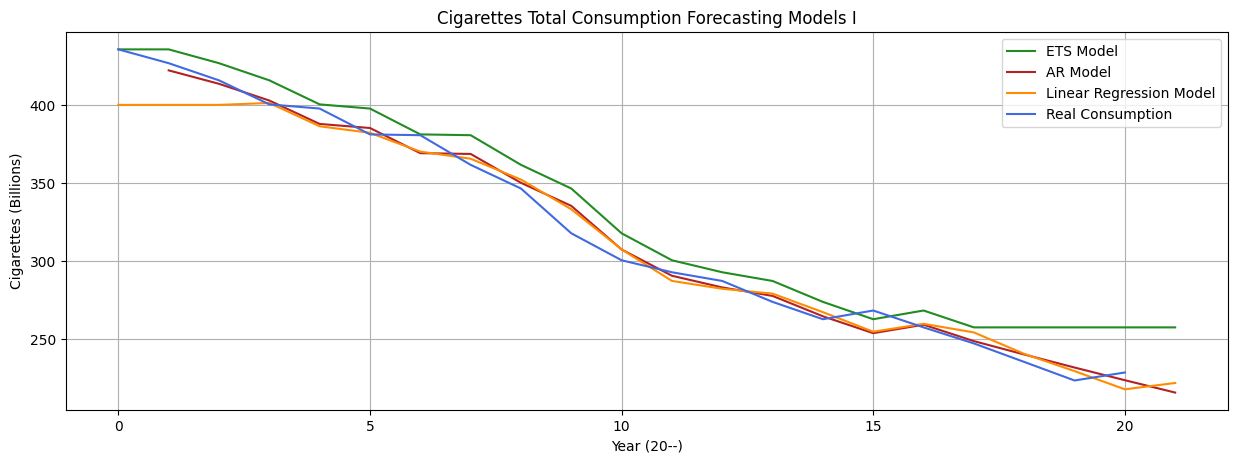

In [94]:
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(ets_forecast, color = 'forestgreen' )
plt.plot(ar_forecast, color = 'firebrick')
plt.plot(linear_forecast, color = 'darkorange')
plt.plot(ts['Total'].values, color = 'royalblue')
plt.gca().set(title = 'Cigarettes Total Consumption Forecasting Models I', 
              xlabel = 'Year (20--)',
              ylabel = 'Cigarettes (Billions)')
plt.legend(['ETS Model', 'AR Model', 'Linear Regression Model', 'Real Consumption'])
plt.grid(True)
plt.show()

## **Conclusions**

---



Based on the previous procedures, as well as the results obtained through the visualization of the original data and the application of the model, it is possible to make some pertinent conclusions:


1.   **Change in the distribution of consumption of domestic and imported products:**  In general, it is not possible to observe a clear increase or decrease in the percentage of products consumed in the United States that are imported. However, there is an exception to this situation, as can be observed in the "Total Domestic and Imported Tobacco Products" chart of cigars, which highlights an increase in the number of cigars that are imported over the years. Therefore, there is a trend of increase in imported cigars, which begin to represent more than 50% of the cigars consumed.

2.   **Cigarette consumption is declining in the United States:** As indicated in the graph 'Total Domestic and Imported Tobacco Products' for Cigarettes and 'Cigarettes Total Consumption in the U.S. from 2000 to 2020', as well as in the preparation of the forecast for 2021, cigarette consumption has been decreasing over the years. However, this highlight of the fall can be explained by multiple factors, such as the increase in cigarette prices and taxes, campaigns against smoking, laws for tobacco-free spaces, as well as the distribution of information related to the effects of smoking (American Heart Association, 2018). Likewise, this decline can be explained by the increase in popularity of other products, such as electric cigarettes (American Heart Association, 2018), or other products containing tobacco.

3. **Nevertheless, cigarettes remain as the most consumed tobacco product:**Despite the decrease in consumption, the cigarette remains positioned as the most consumed tobacco product among those considered in this report. This claim is supported by the article "Cigarette Smoking Among U.S. Adults Hits All-Time Low", which states that the cigar represented 13.7% of tobacco products in 2018 (Centers for Disease Control and Prevention, 2019).

4. **The forecast for 2021 cigarette consumption:** Based on the auto-regression model, which presented the lowest RMSE, it is possible to predict a consumption of 215.70 billion cigarettes in 2021; thus respecting the decrease that was visualized from the data used. However, considering the second best model developed, the forecast from a linear regression is 221.83 billion cigarettes; this is a forecast whose value also follows the negative trend of consumption, but which reflects a smaller decrease. In any case, due to the RMSE scores, both values could be considered to be within the confidence interval.


## **References**

---
American Heart Association. (2018). *Smoking in America: Why more Americans are kicking the habit*, from https://www.heart.org/en/news/2018/08/29/smoking-in-america-why-more-americans-are-kicking-the-habit

Centers for Disease Control and Prevention. (2019). *Cigarette Smoking Among U.S. Adults Hits All-Time Low*, from https://www.cdc.gov/media/releases/2019/p1114-smoking-low.html#:~:text=Cigarette%20smoking%20among%20U.S.%20adults%20has%20reached%20an%20all%2Dtime,the%20health%20consequences%20of%20smoking.
